# Exploratory Data Analysis Project with Medical Insurance Cost Dataset

### 1. DataSet Inspection

#### 1.1 Import the required libraries

In [2]:
# Import core data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline  

# Import statistical testing functions from scipy
from scipy import stats 
from scipy.stats import (
    chi2_contingency,  # Relationship between two categorical variables
    pearsonr,         # Linear correlation: two continuous variables
    pointbiserialr,   # Linear correlation: binary vs continuous
    spearmanr,        # Non-linear correlation: ranked/ordinal data
    f_oneway,         # Compare means: 3+ groups (normal distribution)
    kruskal,          # Compare means: 3+ groups (non-normal distribution)
    ttest_ind,        # Compare means: 2 groups (normal distribution)
)

#### 1.2 Read the CSV File into a DataFrame

In [4]:
df = pd.read_csv('insurance.csv')

#### 1.3 Check the shape of the dataset to see the number of observations and variables

In [7]:
df.shape

(1338, 7)

#### 1.4 Get info about column names, their data types, non-null counts, and memory usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Numerical Values: age,bmi,children,charges

Cataegorical Values: sex,smoker,region

#### 1.5 Check for duplicates, and if there is any, drop them and reset the index

In [6]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicated rows that are deleted: {duplicates}")

df.reset_index(drop=True, inplace=True)

Duplicated rows that are deleted: 1


#### 1.6 Check for missing values, and if there is any, drop the rows or only the cells or fill the cells with the mean or the median of the column

In [20]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values in a dataframe
# df = df.dropna()
# Drop cells with missing values in a column
# df = df.dropna(subset=[‘column_name’])
# Fill missing values in all columns with the mean of the columns
# df = df.fillna(df.mean())
# Fill missing values in all columns with the median of the columns
# df = df.fillna(df.median())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### 1.7 Convert the object variables into categorical ones, and define their category ranges or orders, if any

In [8]:
# Helper function to define BMI categories
def bmi_cat(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal weight'
    elif 25 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

# Apply the function to create a new column called bmi_cat
df['bmi_cat'] = df['bmi'].apply(bmi_cat) # This column will automatically be an object column
# Identify object columns and convert them to categorical columns
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].astype('category')
# Set the category order of the ordinal variable  bmi_cat
df['bmi_cat'] = df['bmi_cat'].cat.set_categories(['underweight', 'normal weight', 'overweight', 'obese'], ordered=True)

# Control the conversion
print(df.dtypes)
print("\n")
print(df.head())

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include='category').columns
num_cols = df.select_dtypes(include='number').columns

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
bmi_cat     category
dtype: object


   age     sex     bmi  children smoker     region      charges        bmi_cat
0   19  female  27.900         0    yes  southwest  16884.92400     overweight
1   18    male  33.770         1     no  southeast   1725.55230          obese
2   28    male  33.000         3     no  southeast   4449.46200          obese
3   33    male  22.705         0     no  northwest  21984.47061  normal weight
4   32    male  28.880         0     no  northwest   3866.85520     overweight


### 2. Descriptive Statistics

### 2.1 Categorical Summary

#### 2.1.1  Frequency and Relative Frequency (Counts and Proportions)

=== Categorical Variables Distribution Summary ===

Variable      Category  Count  Proportion Percentage
     sex          male    675    0.504862      50.5%
     sex        female    662    0.495138      49.5%
  smoker            no   1063    0.795064      79.5%
  smoker           yes    274    0.204936      20.5%
  region     southeast    364    0.272251      27.2%
  region     southwest    325    0.243082      24.3%
  region     northeast    324    0.242334      24.2%
  region     northwest    324    0.242334      24.2%
 bmi_cat         obese    721    0.539267      53.9%
 bmi_cat    overweight    374    0.279731      28.0%
 bmi_cat normal weight    222    0.166043      16.6%
 bmi_cat   underweight     20    0.014959       1.5%


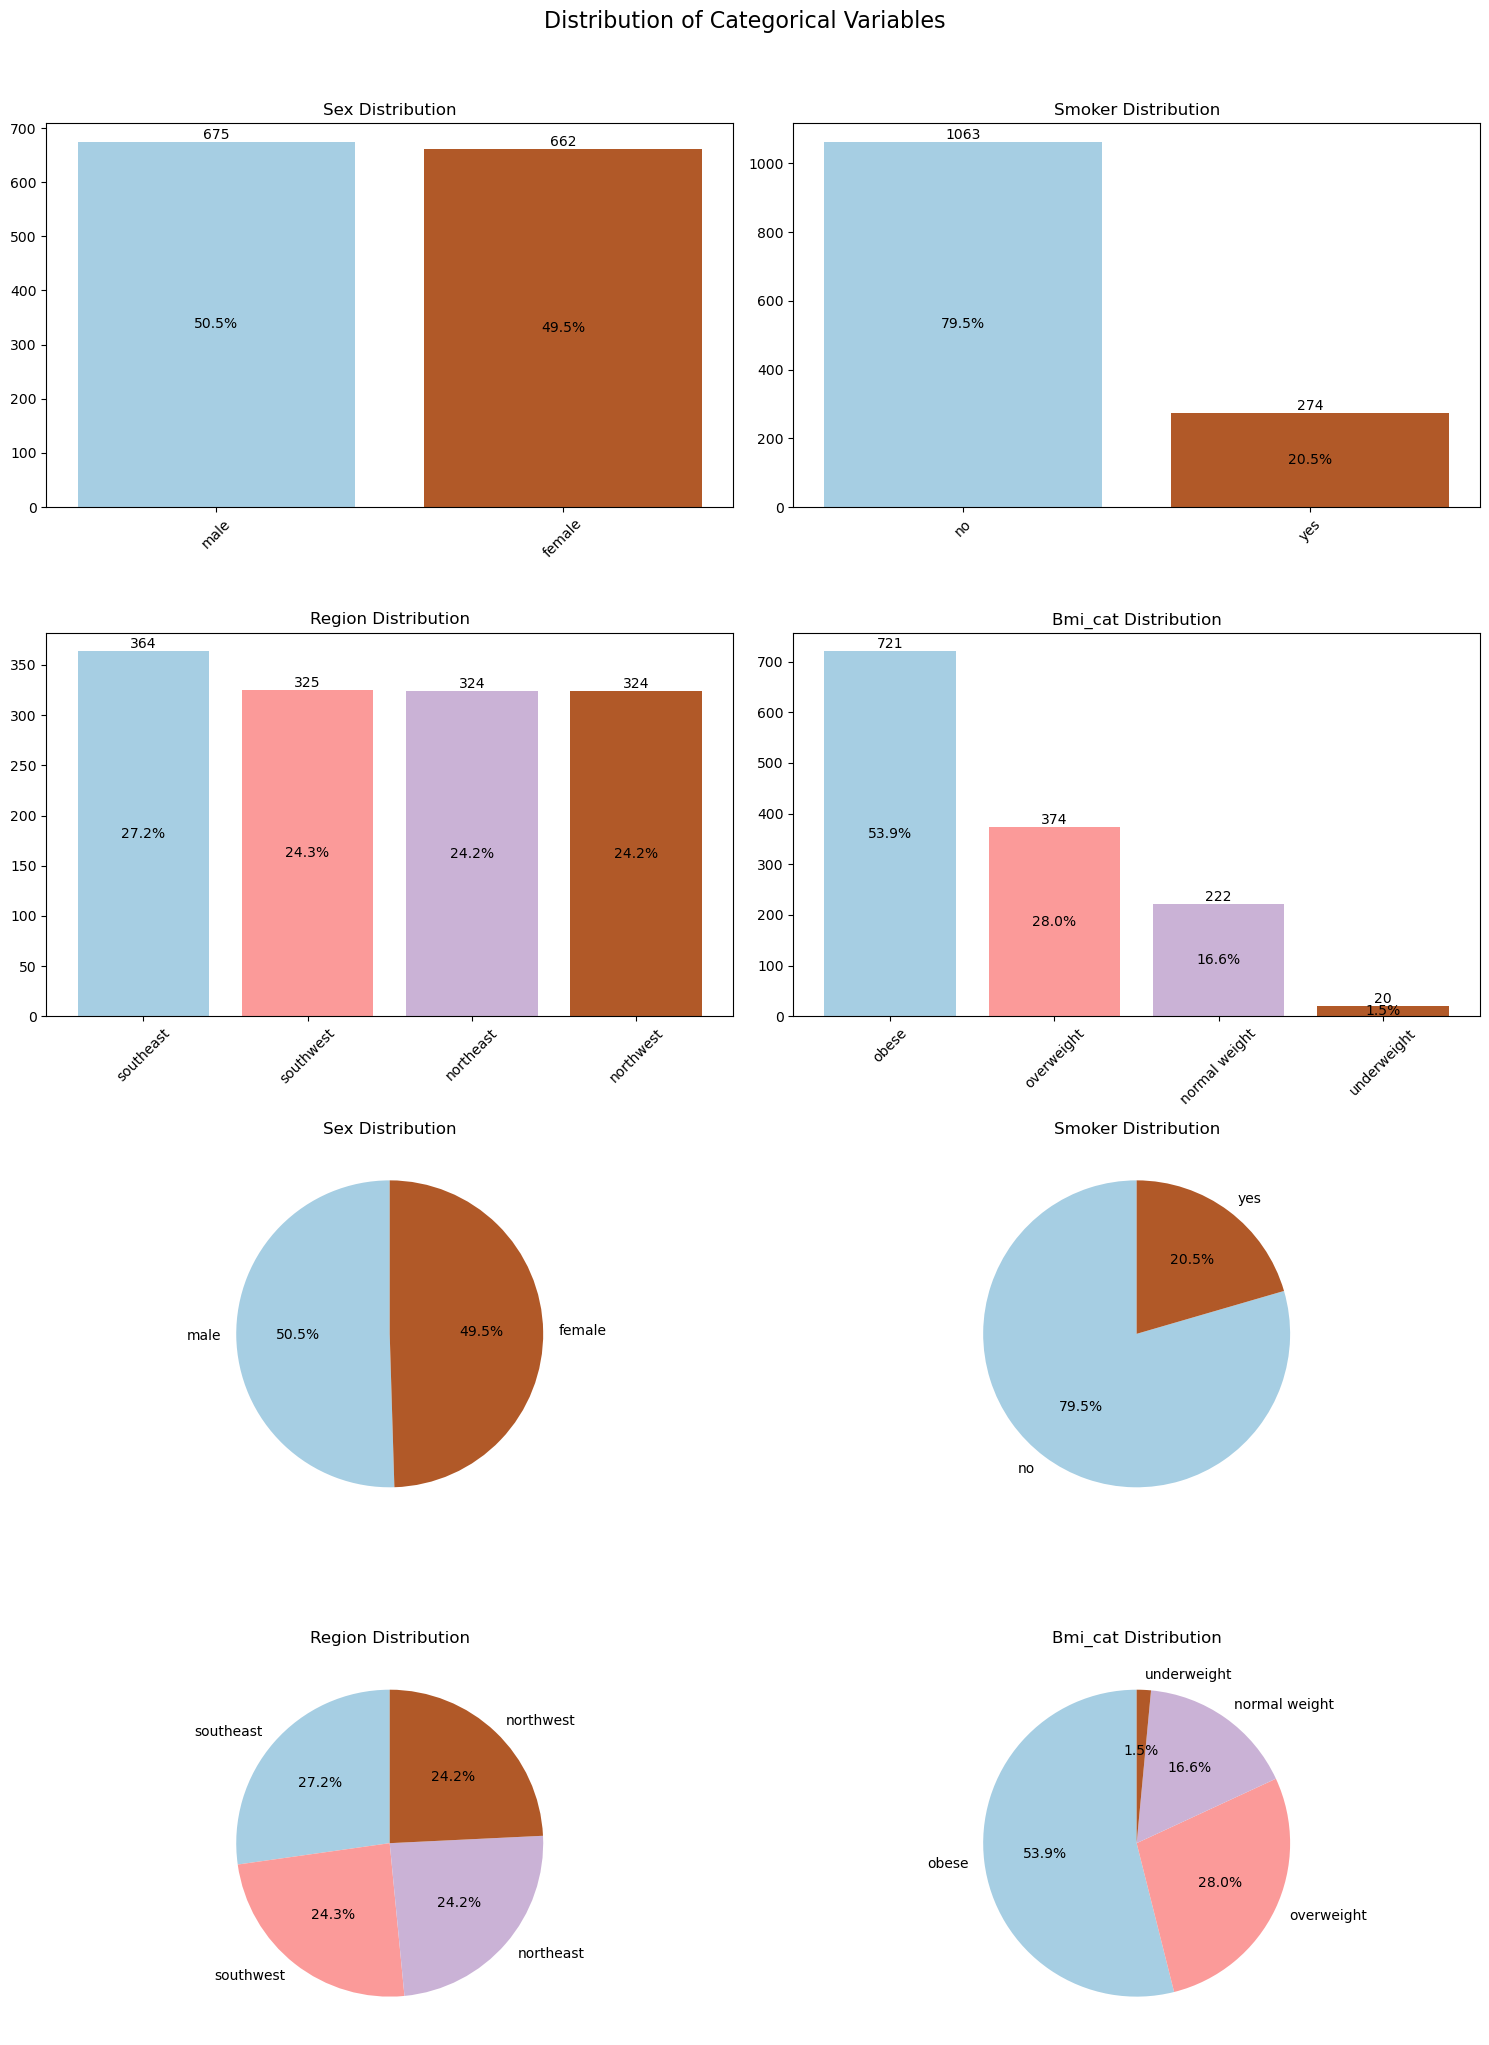

In [10]:
def analyze_categorical_distributions(df, cat_cols):
    # Create a DataFrame to store categorical variable statistics
    summary_df = pd.DataFrame()
    
    # Process each categorical variable through a loop to calculate distribution metrics
    for col in cat_cols:
        # Get frequency counts: returns Series (index=categories, values=counts)
        counts = df[col].value_counts()
        # Get proportions: returns Series (index=categories, values=proportions)
        props = df[col].value_counts(normalize=True)
        
       # Create temporary DataFrame through a loop to store metrics for current variable
        temp_df = pd.DataFrame({
            'Variable': col, # e.g. 1st loop: Smoker / 2nd loop: Smoker (always category names)
            'Category': counts.index, # e.g. 1st loop: No / 2nd loop: Yes (unique categories from counts.index)
            'Count': counts.values, # e.g. 1063 / 275 (frequency of each category from counts.values)
            'Proportion': props.values # e.g. 0.795064 / 0.204936 (proportion of each category from props.values)
        })
        
        # Append current variable's metrics in the temporary DataFrame to main summary DataFrame
        summary_df = pd.concat([summary_df, temp_df], ignore_index=True)
    
   # Format proportions as percentages with one decimal place (apply it to whole series with map)
    summary_df['Percentage'] = summary_df['Proportion'].map('{:.1%}'.format) # (e.g., 79.5%)
    
    # Display full summary table (prevent truncation with to_string)
    # Note: For global truncation prevention use:
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.width', None)
    print("=== Categorical Variables Distribution Summary ===\n")
    print(summary_df.to_string(index=False))
    
    # Calculate subplot rows based on number of categorical variables
    n_rows = len(cat_cols)
    
    # Create figure to visualize the charts all together
    fig = plt.figure(figsize=(15, 5*n_rows)) # figsize=(width, height) in inch
    fig.suptitle('Distribution of Categorical Variables', fontsize=16, y=1.02) # y: vertical position of suptitle wrt charts (>1 moves up)
    
    # Create visualizations for each categorical variable
    for idx, col in enumerate(cat_cols, 1): 
        # Filters and stores rows for current variable (the subset of the categorical summary table)
        data = summary_df[summary_df['Variable'] == col]
        # Generate color palette
        # np.linspace(start,stop,num) -> returns array of evenly spaced values
        # plt.cm.Paired() -> converts these values to RGB colors -> returns array of RGB tuples
        colors = plt.cm.Paired(np.linspace(0, 1, len(data))) # (e.g., [0, 0.25, 0.75, 1] for 4 categories)
        colors_list = [colors[i] for i in range(len(data))] # (e.g., blue, pink, purple and brown bars)
        
        # Create bar chart
        # Create subplots (axes objects)
        plt.subplot(n_rows, 2, idx) # plt.subplot(n_rows, n_cols, grid_position)
        bars = plt.bar(data['Category'], # x-axis = categories (e.g., ['Yes', 'No'])
                       data['Count'], # y-axis = their counts (e.g., [1063, 275])
                       color=colors_list) # colors of bars from the color list we created before
        plt.title(f"{col.capitalize()} Distribution")
        plt.xticks(rotation=45)
        
        # Add count labels on top of bars
        for bar in bars:
            height = bar.get_height() # Get count value to define the height (e.g., 1063 for 'Yes')
            plt.text(
                # Get the left edge position of the bar (e.g. get_x() = 0) on x-axis
                # Get the bar width (e.g. get_width() = 1)
                bar.get_x() + bar.get_width()/2., # Get the middle of the bar by dividing the total into 2 (e.g., (0 + 1)/2 = 0.5)
                height, # Set the height of the bar on y-axis (Count value)
                f'{int(height)}', # Write the count value on the position defined above
                ha='center', # Align the text horizontally on the center of the bar
                va='bottom') # Allign the text vertically on the bottom of the bar
        
        # Add percentage labels in middle of bars
        for bar, p in zip(bars, data['Proportion']): # Pairs each bar with its proportion
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2.,
                height/2.,
                f'{p:.1%}', # Write the percentage value on the position defined above
                ha='center',
                va='center')
        
        # Create pie chart
        plt.subplot(n_rows, 2, idx + len(cat_cols)) # New subplot for pie chart
        plt.pie(data['Count'], # Values
                labels=data['Category'], # Labels each wedge of the pie chart with the category names
                autopct='%1.1f%%', # Puts an automatic percentage on each wedge in the given format
                colors=colors_list, # Gives colors to each wedge from the color list we created before
                startangle=90)  # Starts the angle of the first wedge with the given number
        plt.title(f"{col.capitalize()} Distribution")

    # Adjust layout of the plots for readability
    plt.tight_layout()
    # Display the plots
    plt.show() 
    
    return summary_df

# Call the function
categorical_summary = analyze_categorical_distributions(df, cat_cols)

Take-aways:

1- The data is almost evenly between male (50.5%) and female (49.5%).

2- ***Most people (79.5%) are non-smokers***, while 20.5% are smokers.

3- The population is distributed fairly evenly across regions. (Southeast (27.2%), Southwest (24.3%), Northeast (24.2%), Northwest (24.2%))

4- ***Obese individuals form the largest group (53.9%)***, while overweight individuals make up 28%, those with normal weight account for 16.6%, and underweight individuals are the smallest group at 1.5%.

#### 2.1.2 Analysis and Visualization of Categorical Variable Relationships (Independence Testing with Chi-Square, Relationship Strength with Cramér's V, and Distribution Visualization)

=== Categorical Variable Relationship Analysis ===

Variable 1 Variable 2  P-value Dependent  Cramer's V   Strength
    region    bmi_cat    0.000       Yes       0.124       Weak
       sex     smoker    0.006       Yes       0.075 Negligible
    smoker     region    0.064        No         NaN       None
       sex    bmi_cat    0.435        No         NaN       None
    smoker    bmi_cat    0.760        No         NaN       None
       sex     region    0.924        No         NaN       None


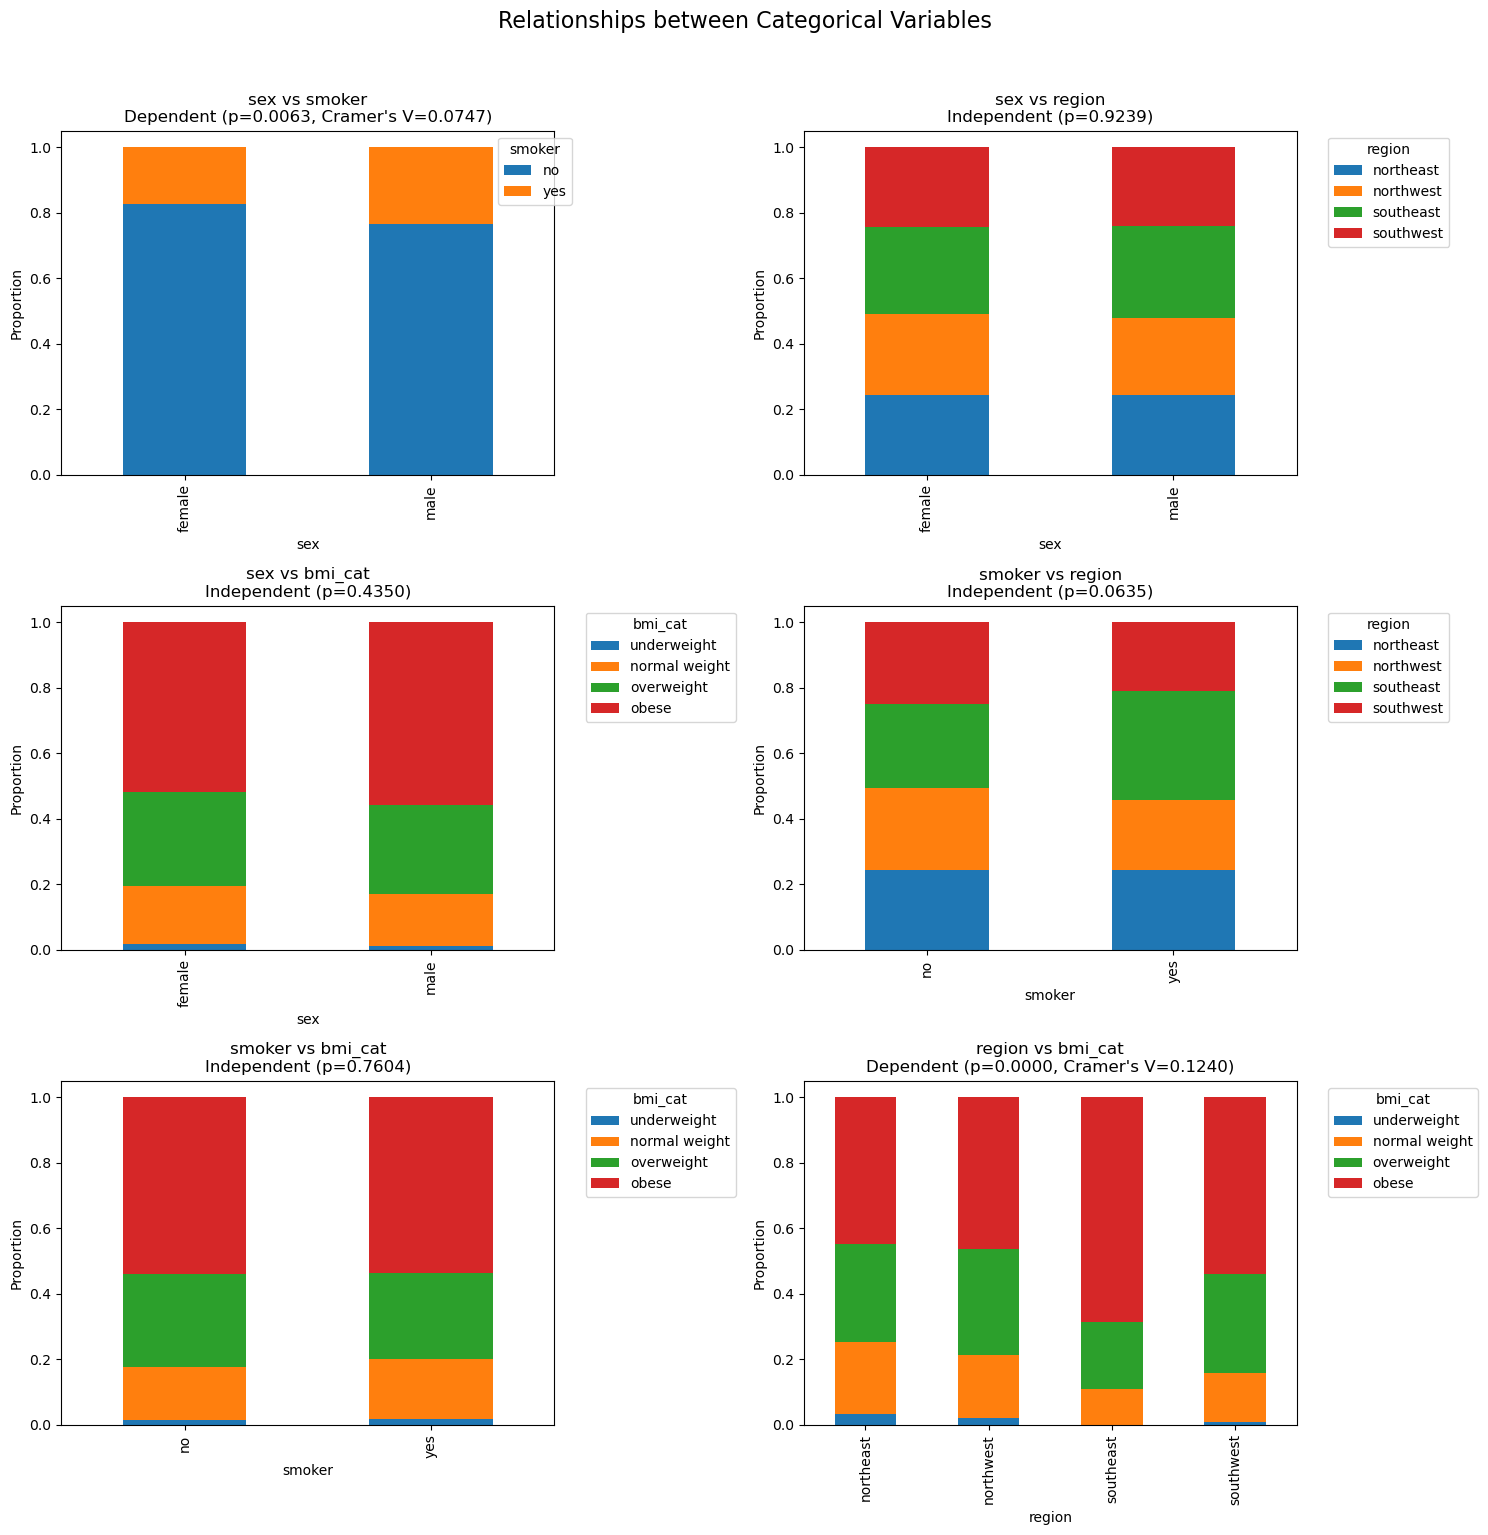

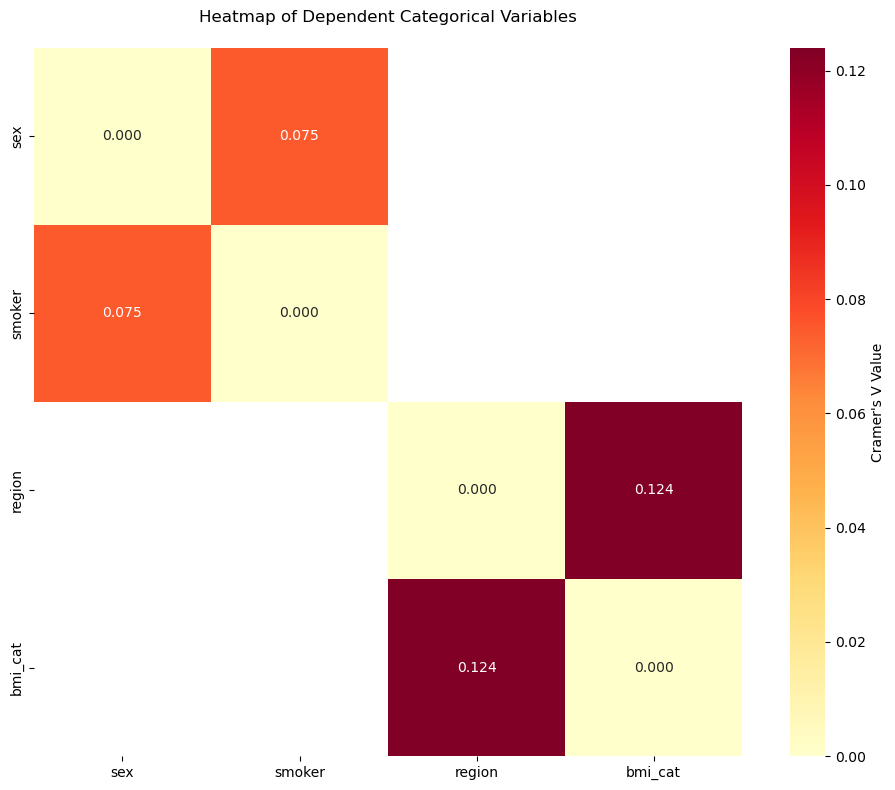

In [42]:
def analyze_categorical_relationships(df, cat_cols):
    # Create helper function to interpret the strength of relationships based on Cramer's V values
    def interpret_cramers_v(v):
        # Return categorical interpretation of V value according to the ranges below
        if v < 0.1:
            return "Negligible"
        elif v < 0.2:
            return "Weak"
        elif v < 0.3:
            return "Moderate"
        elif v < 0.4:
            return "Strong"
        else:
            return "Very Strong"

    # Create helper function to calculate Cramer's V statistic
    def cramers_v(contingency_table):
        # Calculate Chi-Square statistics
        chi2 = chi2_contingency(contingency_table)[0] # Returns Chi-Square value from the statistics
        # Get the number of total observations for using in Cramer's V formula
        n = contingency_table.sum().sum() # First sums the values in the rows, then, sums all of them together
        # Get the minimum dimension of the contingency table for the standarization in the Cramer's V formula
        min_dim = min(contingency_table.shape) - 1 # Gets smaller value between row and column numbers and subtracts 1
        # Return Cramer's V value
        return np.sqrt(chi2 / (n * min_dim)) # Returns the square root of Chi-Square divided by (n * min_dim)

    # Initialize containers for analysis result
    results = []  # List to store the statistics results for later analysis
    n = len(cat_cols)  # Gets the number of categorical variables to create matrix
    matrix = np.zeros((n, n))  # Matrix to store Cramer's V values for pairs of variables
    p_values = np.zeros((n, n))  # Matrix to store p-values for pairs of variables

    print("=== Categorical Variable Relationship Analysis ===\n")

    cont_tables = []  # List to store contingency tables for later plotting

    # Loop through pairs of categorical columns to analyze their relationship
    for i in range(n):
        for j in range(i + 1, n):
            var1, var2 = cat_cols[i], cat_cols[j]
            # Generate contingency table for the pair
            cont_table = pd.crosstab(df[var1], df[var2]) # Returns frequency table for the current variables
            cont_tables.append((var1, var2, cont_table))  # Stores them to the main table for later plotting
            
            # Perform Chi-Square test to test the independence of categorical variables
            chi2, p_value, dof, expected = chi2_contingency(cont_table)

            # If variables are dependent, calculate relationship strength
            if p_value < 0.05:
                # Calculate Cramer's V to find the strength of the dependence
                v = cramers_v(cont_table) # (e.g., 0.418)
                # Interpret the numbers found through Cramer's V
                strength = interpret_cramers_v(v)
                # Store Cramer's V value in the matrix
                matrix[i, j] = matrix[j, i] = v
            # If variables are independent (p-value >= 0.05)
            else:
                v = None  # No Cramer's V value 
                strength = None  # No interpretation of the V value

            # Store p-value symmetrically in matrix for later reference
            p_values[i, j] = p_values[j, i] = p_value

            # Store the results for the current variable pair
            results.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'P-value': p_value,
                'Dependent': 'Yes' if p_value < 0.05 else 'No',
                'Cramer\'s V': v if p_value < 0.05 else None,
                'Strength': strength if p_value < 0.05 else None
            })
    
    # Create a DataFrame to summarize the results
    summary_df = pd.DataFrame(results).sort_values('P-value')
    print(summary_df.to_string(index=False))

        # Calculate dimensions for visualization layout
    n_pairs = len(cont_tables)  # Number of variable pairs to plot
    n_rows = (n_pairs + 1) // 2  # Calculate the required number of rows for subplot grid

    # Create figure and axes for bar charts
    fig_bars, axes_bars = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))  
    # Handle case where there's only one row
    if n_rows == 1:
        axes_bars = np.array([axes_bars])  # Convert to 2D array
    axes_bars = axes_bars.flatten()  # Convert 2D axes array to 1D for easier iteration
    plot_idx = 0  # Initializes counter for subplot positioning
    fig_bars.suptitle("Relationships between Categorical Variables", fontsize=16, y=1.02)

    # Convert categorical columns to list for indexing operations
    cat_cols = list(cat_cols)
    
    # Loop through the contingency tables to create visualization for each variable pair
    for var1, var2, cont_table in cont_tables:
        # Calculate proportional relationships between variables
        prop_table = cont_table.div(cont_table.sum(axis=1), axis=0)
        # Create stacked bar chart showing proportional relationships
        prop_table.plot(kind='bar', stacked=True, ax=axes_bars[plot_idx])

        # Get statistical values for current variable pair from matrices
        p_value = p_values[cat_cols.index(var1), cat_cols.index(var2)]
        v = matrix[cat_cols.index(var1), cat_cols.index(var2)]
    
        # Create title string combining variable names and statistical results
        title = f'{var1} vs {var2}\n'
        title += f'{"Dependent" if p_value < 0.05 else "Independent"}'
        title += f' (p={p_value:.4f}'
        if p_value < 0.05:
            title += f', Cramer\'s V={v:.4f})'
        else:
            title += ')'

        # Set plot attributes
        axes_bars[plot_idx].set_title(title)
        axes_bars[plot_idx].set_xlabel(var1)
        axes_bars[plot_idx].set_ylabel('Proportion')
        axes_bars[plot_idx].legend(title=var2, bbox_to_anchor=(1.05, 1))
        plot_idx += 1

    # Hide any unused subplots
    for idx in range(plot_idx, len(axes_bars)):
        axes_bars[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Create heatmap to visualize Cramer's V values
    plt.figure(figsize=(10, 8))
    # Convert Cramer's V matrix to DataFrame for visualization
    cramer_matrix = pd.DataFrame(matrix, index=cat_cols, columns=cat_cols)
    # Create mask for non-significant relationships
    mask = p_values >= 0.05  # Masks relationships where p-values indicates independence

    # Plot heatmap of Cramer's V values, masking non-significant relationships
    sns.heatmap(
        cramer_matrix, # DataFrame containing Cramer's V values
        annot=True,  # Adds the Cramer's V values as text labels in each cell
        cmap='YlOrRd', # Uses color gradient from Yellow to Red
        mask=mask, # Hides non-significant relationships
        fmt='.3f', # Formats numbers to 3 decimal places
        square=True, # Makes cells square instead of rectangular
        cbar_kws={'label': "Cramer's V Value"})  # Adds title to the colorbar legend
    
    plt.title("Heatmap of Dependent Categorical Variables\n")
    plt.tight_layout()
    plt.show()

    return summary_df

# Call the function
categorical_summary = analyze_categorical_relationships(df, cat_cols)

Take-aways:


1- Gender has a negligible influence on smoking patterns across the population. (Cramer's V = 0.075)


2- BMI categories show weak variation across different geographic regions. (Cramer's V = 0.124)

## 2.2 Numerical Summary

#### 2.2.1 Central Tendencies

=== Numeric Variables Analysis ===

              Mean   Median     Mode   Std Dev      Variance      Min  \
Variable                                                                
age         39.222   39.000   18.000    14.044       197.243   18.000   
bmi         30.663   30.400   32.300     6.100        37.216   15.960   
children     1.096    1.000    0.000     1.206         1.453    0.000   
charges  13279.121 9386.161 1121.874 12110.360 146660811.006 1121.874   

               Max     Range       IQR  Q1 (25th)  Q3 (75th)  Skewness  \
Variable                                                                 
age         64.000    46.000    24.000     27.000     51.000     0.055   
bmi         53.130    37.170     8.410     26.290     34.700     0.284   
children     5.000     5.000     2.000      0.000      2.000     0.937   
charges  63770.428 62648.554 11911.373   4746.344  16657.717     1.515   

          Kurtosis      MAD  Trimmed Mean  Outlier Count  Outlier %  
Variable  

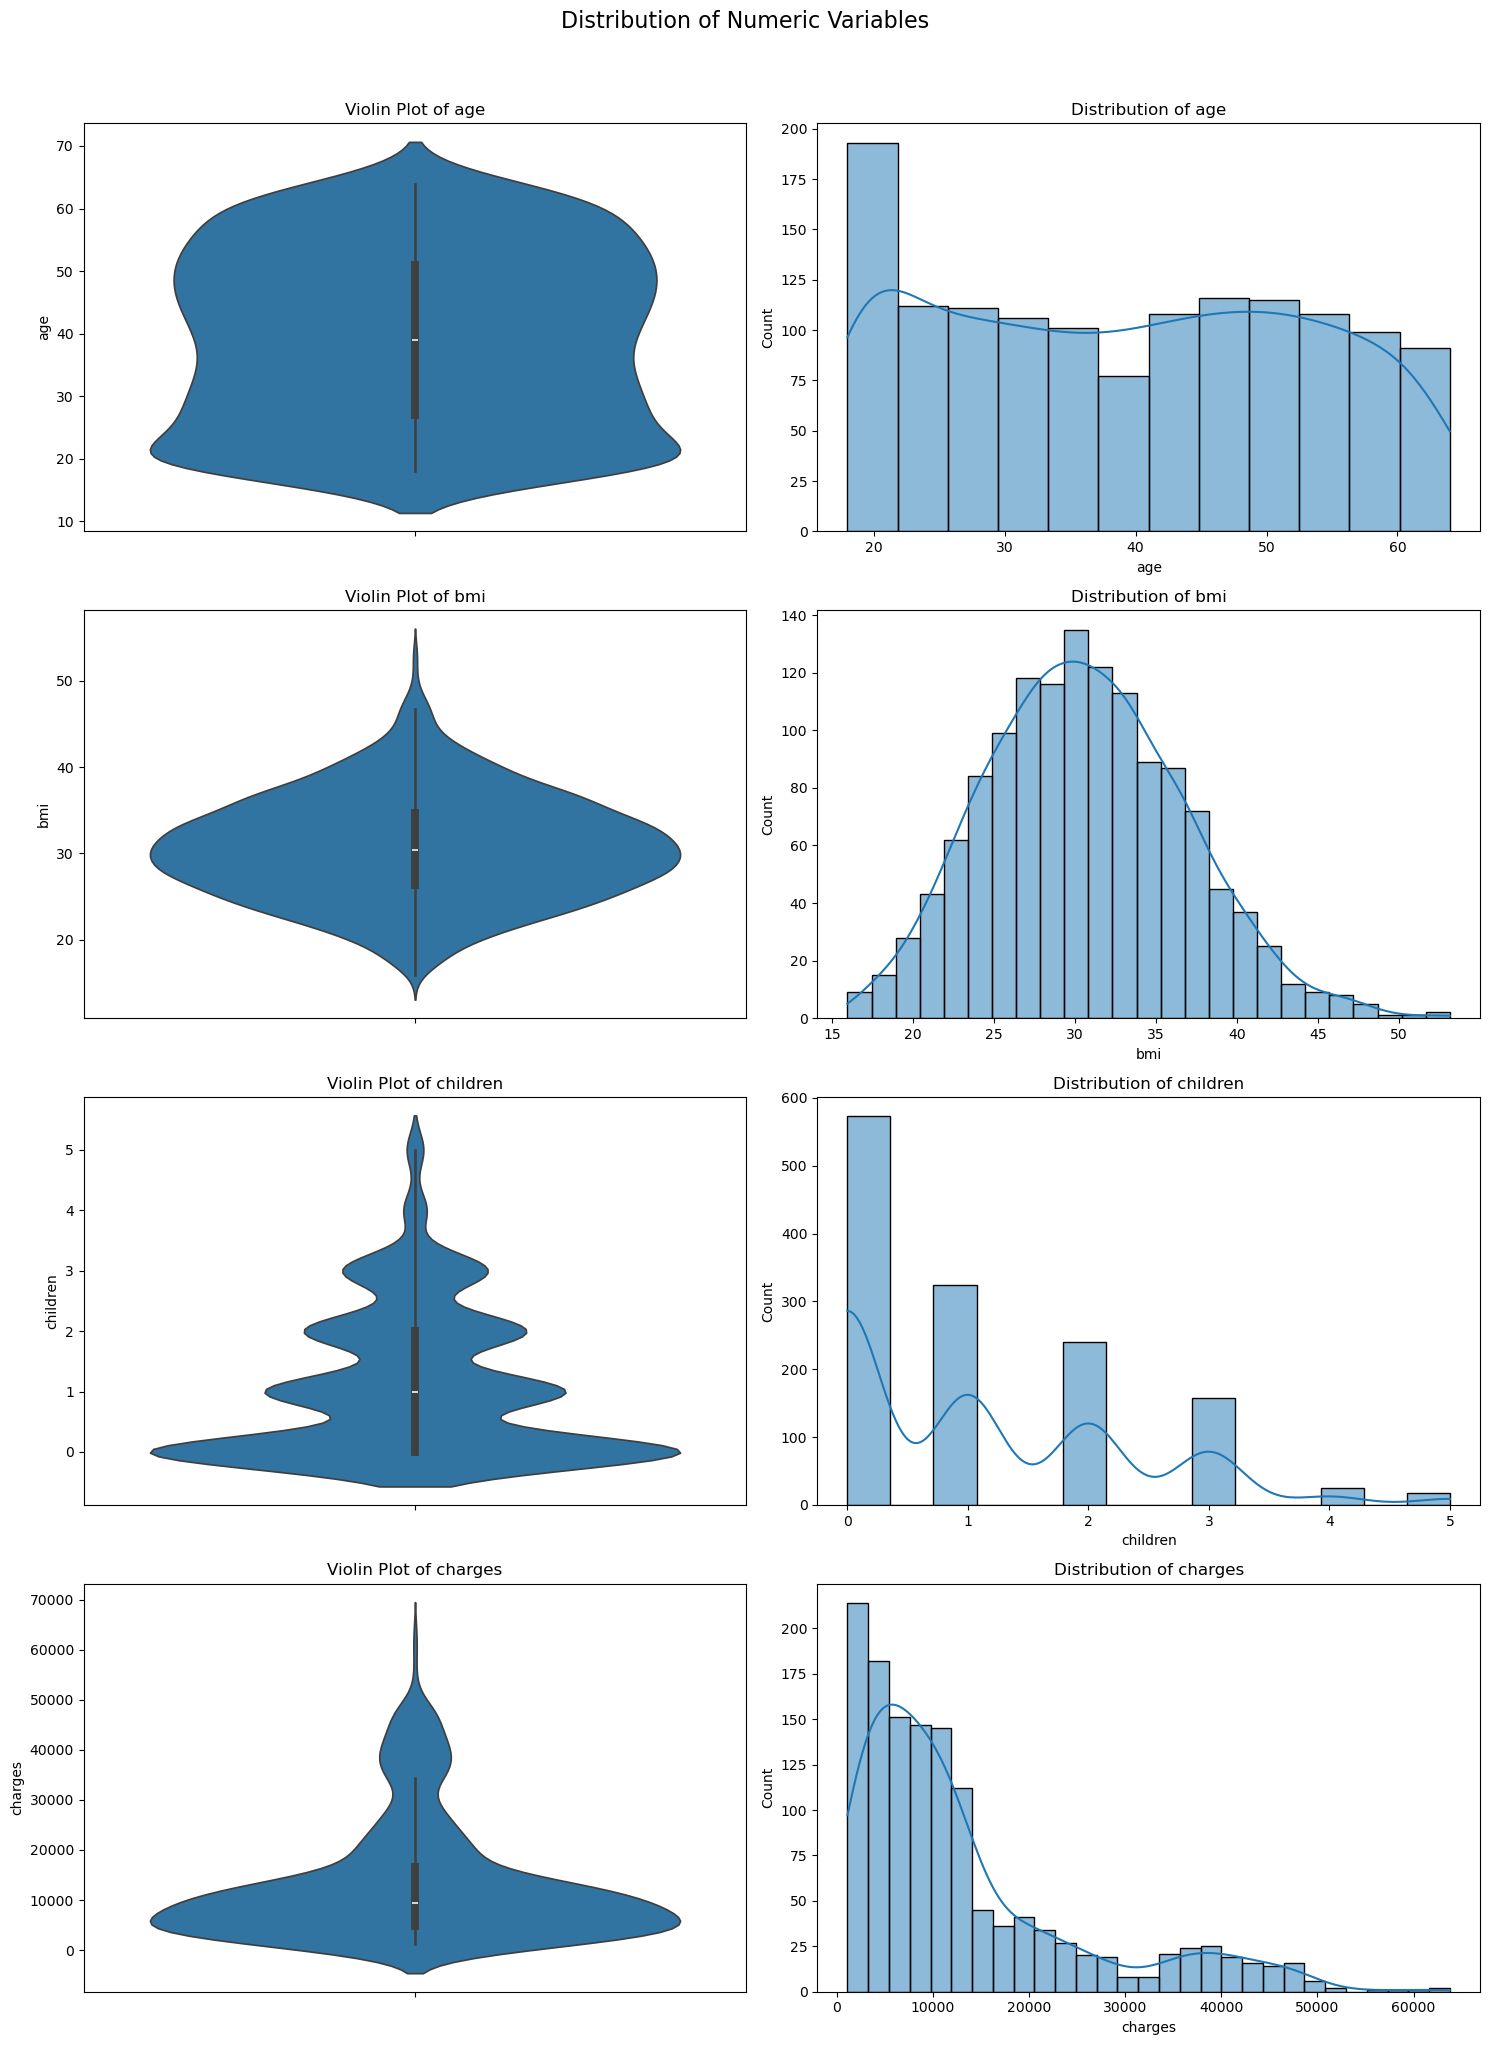

In [14]:
def analyze_numerical_distributions(df, num_cols):
    # Helper function to calculate Median Absolute Deviation
    def calculate_mad(series):
        # Find the median of the series
        median = series.median()
        # Calculate the mean of absolute difference between each value and the median
        mad = (series - median).abs().mean()
        return mad
    
    # Create a DataFrame for statistical summary
    stats_df = pd.DataFrame()
    
    # # Calculate numerical statistics for each numerical variable thorugh a loop
    for col in num_cols:
        # Calculate quartiles (Q1 and Q3) and interquartile range (IQR)
        q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        iqr_value = q3 - q1  # Interquartile range
        
        # Calculate lower and upper bounds for outlier detection
        lower_bound = q1 - 1.5 * iqr_value
        upper_bound = q3 + 1.5 * iqr_value
        
        # Identify outliers that fall outside the bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        # Calculate the trimmed dataset (excluding outliers)
        trimmed_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
        
        # Collect statistics in a dictionary for the current column
        stats = {
            'Variable': col,  # Column name
            'Mean': df[col].mean(),  # Average value
            'Median': df[col].median(),  # Middle value
            # Ternary operator: <value> if not <condition> else <alternative>
            'Mode': df[col].mode().iloc[0] if not df[col].mode().empty else None,  # Most frequent value
            'Std Dev': df[col].std(),  # Standard deviation (spread of data)
            'Variance': df[col].var(),  # Variance (square of standard deviation
            'Min': df[col].min(),  # Smallest value
            'Max': df[col].max(),  # Largest value
            'Range': df[col].max() - df[col].min(),  # Difference between max and min
            'IQR': iqr_value,  # Interquartile range
            'Q1 (25th)': q1,  # 25th percentile
            'Q3 (75th)': q3,  # 75th percentile
            'Skewness': df[col].skew(),  # Skewness, measure of asymmetry
            'Kurtosis': df[col].kurt(),  # Kurtosis, measure of tailedness
            'MAD': calculate_mad(df[col]),  # Median Absolute Deviation
            'Trimmed Mean': trimmed_data.mean(),  # Mean after removing outliers
            'Outlier Count': len(outliers),  # Number of outliers
            'Outlier %': (len(outliers) / len(df)) * 100  # Percentage of outliers
        }
        
        # Append current variable's metrics to main summary DataFrame
        stats_df = pd.concat([stats_df, pd.DataFrame([stats])], ignore_index=True)
    
    # Set variable names as index for better readability
    stats_df = stats_df.set_index('Variable')
    
    # Display full summary table (set the limit for float decimal with float_format)
    # For temporary float formatting:
    # with pd.option_context('display.float_format', lambda x: '{:.3f}'.format(x)):
    print("=== Numeric Variables Analysis ===\n")
    pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
    print(stats_df)
    
    # Calculate subplot rows based on number of categorical variables
    n_cols = len(num_cols)

    # Create figure to visualize the charts all together
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    # Add a superior title to the figure
    fig.suptitle('Distribution of Numeric Variables', fontsize=16, y=1.02)

    # Create visualizations for each numerical variable
    for idx, col in enumerate(num_cols):
        # Create violin plot with box plot inside
        sns.violinplot(data=df, y=col, ax=axes[idx, 0], inner='box')
        axes[idx, 0].set_title(f'Violin Plot of {col}')
        
        # Histogram with Kernel Density Estimate
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()
    
    return stats_df

# Call the function
numerical_summary = analyze_numerical_distributions(df, num_cols)

Take-aways:

1- The dataset covers a wide age range with a balanced distribution.


2- BMI values are generally high across the population.


3- The majority of families have few or no children.


4- Healthcare charges are highly variable with some extreme cases present.

#### 2.2.2 Analysis and Visualization of Numerical Variable Relationships (Distribution Testing with Normality, Relationship Strength with Correlation Coefficients, and Pattern Visualization)

=== Numerical Variable Relationship Analysis ===:

    Var1     Var2 Dist. of Var1 Dist. of Var2  Rel. Type Corr. Method Corr. Coefficient P-value Rel. Strength
     age      bmi    Non-normal        Normal     Linear     Spearman            0.1079  0.0001         Small
     age children    Non-normal    Non-normal Non-linear     Spearman            0.0558  0.0413    Negligible
     age  charges    Non-normal    Non-normal     Linear     Spearman            0.5335  0.0000         Large
     bmi children        Normal    Non-normal Non-linear     Spearman            0.0156  0.5677    Negligible
     bmi  charges        Normal    Non-normal     Linear     Spearman            0.1196  0.0000         Small
children  charges    Non-normal    Non-normal     Linear     Spearman            0.1322  0.0000         Small


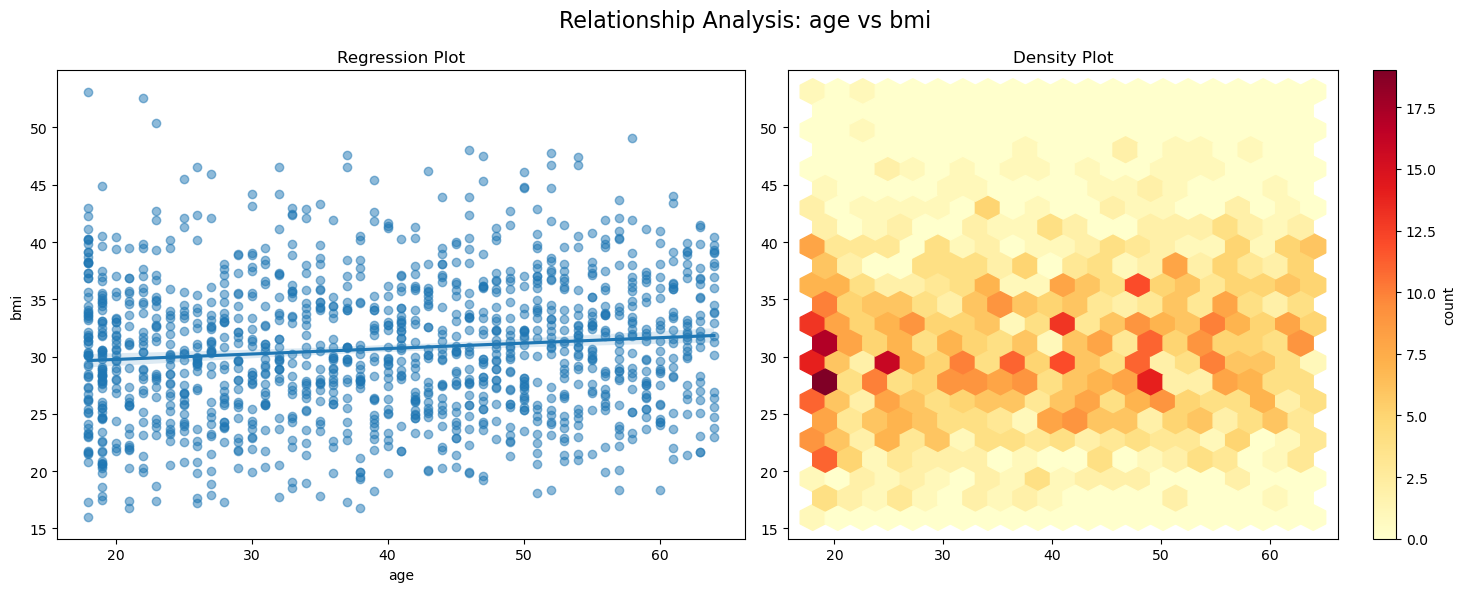

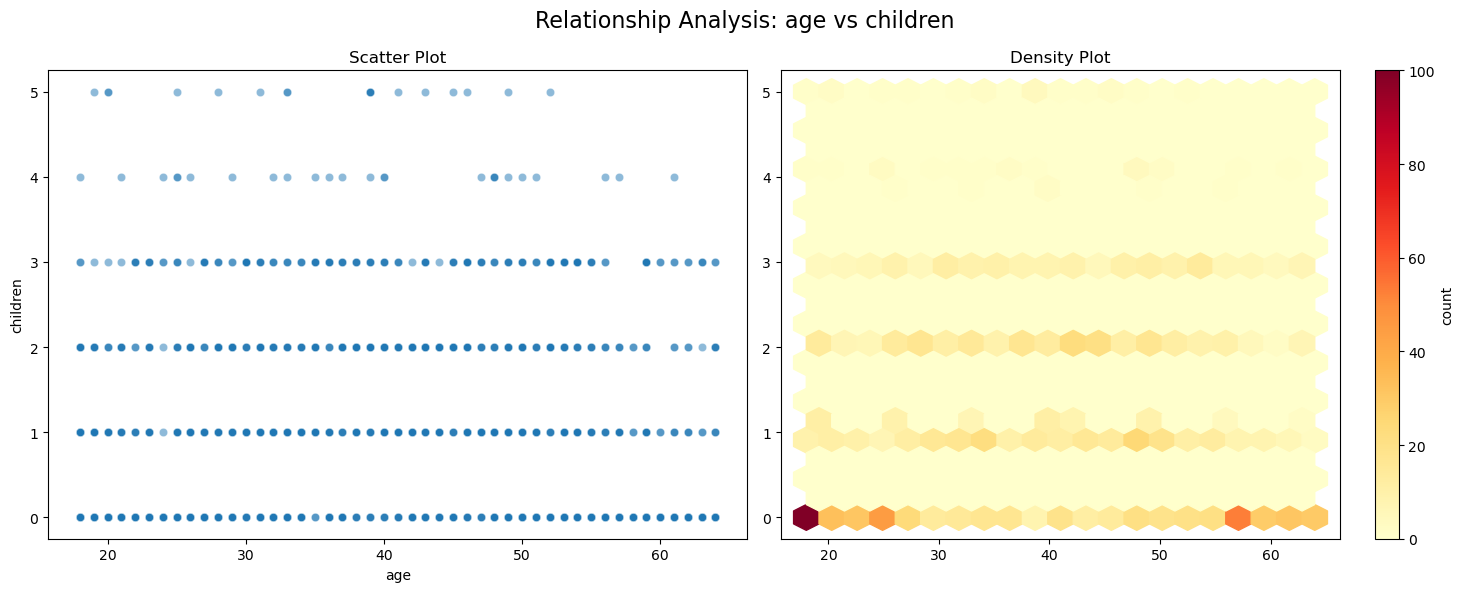

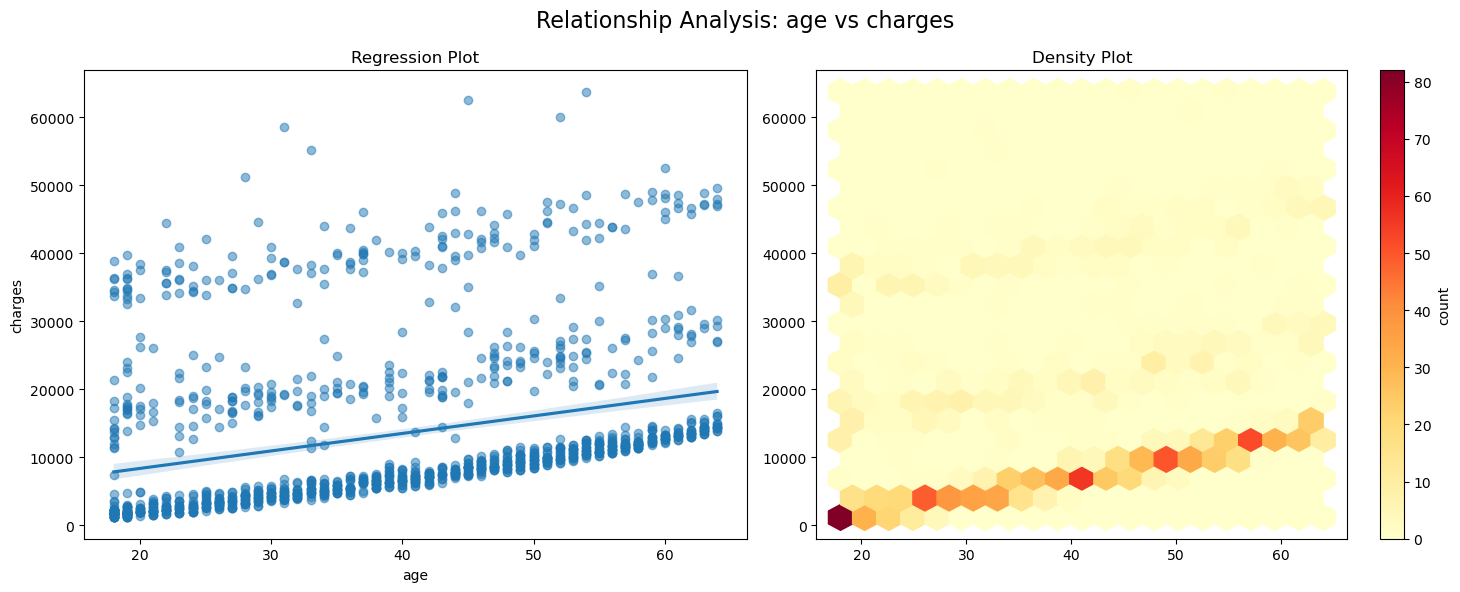

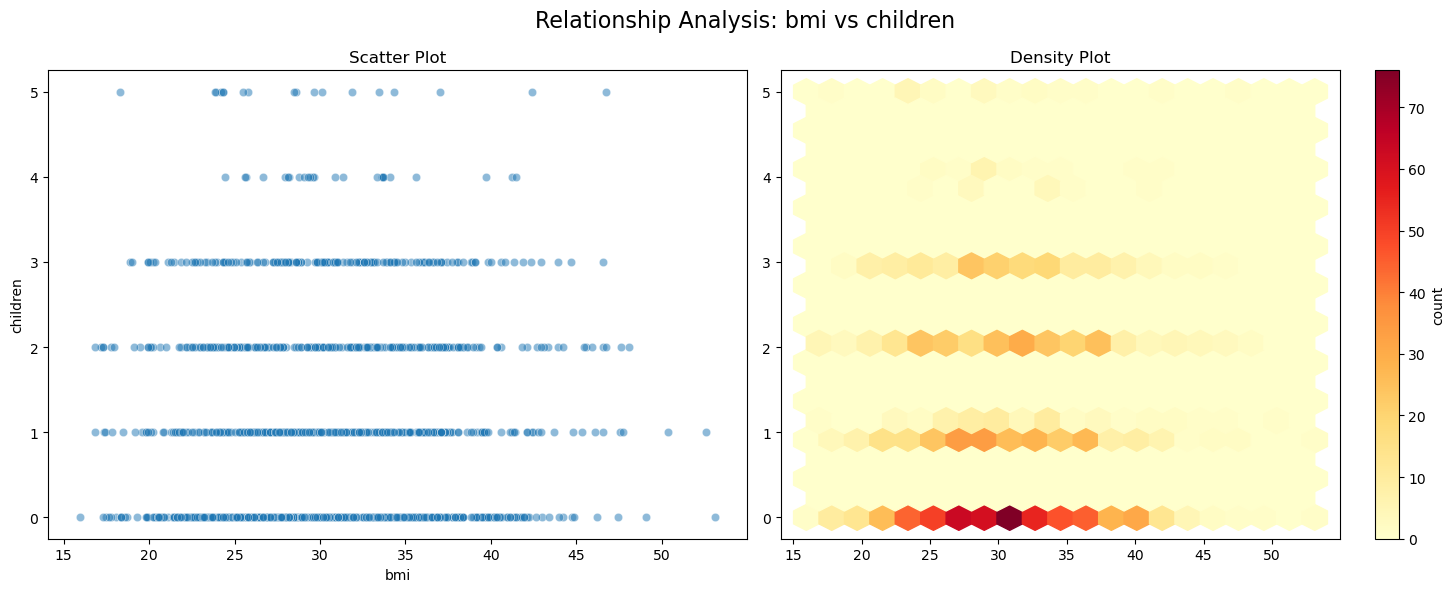

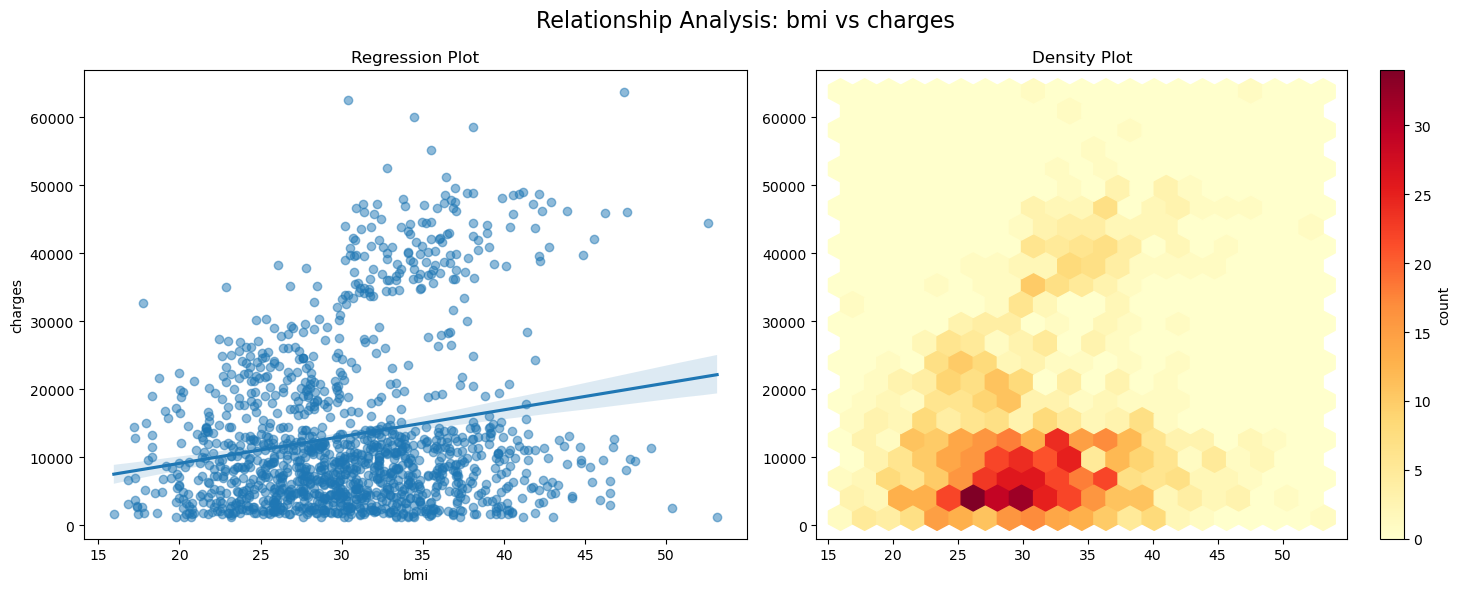

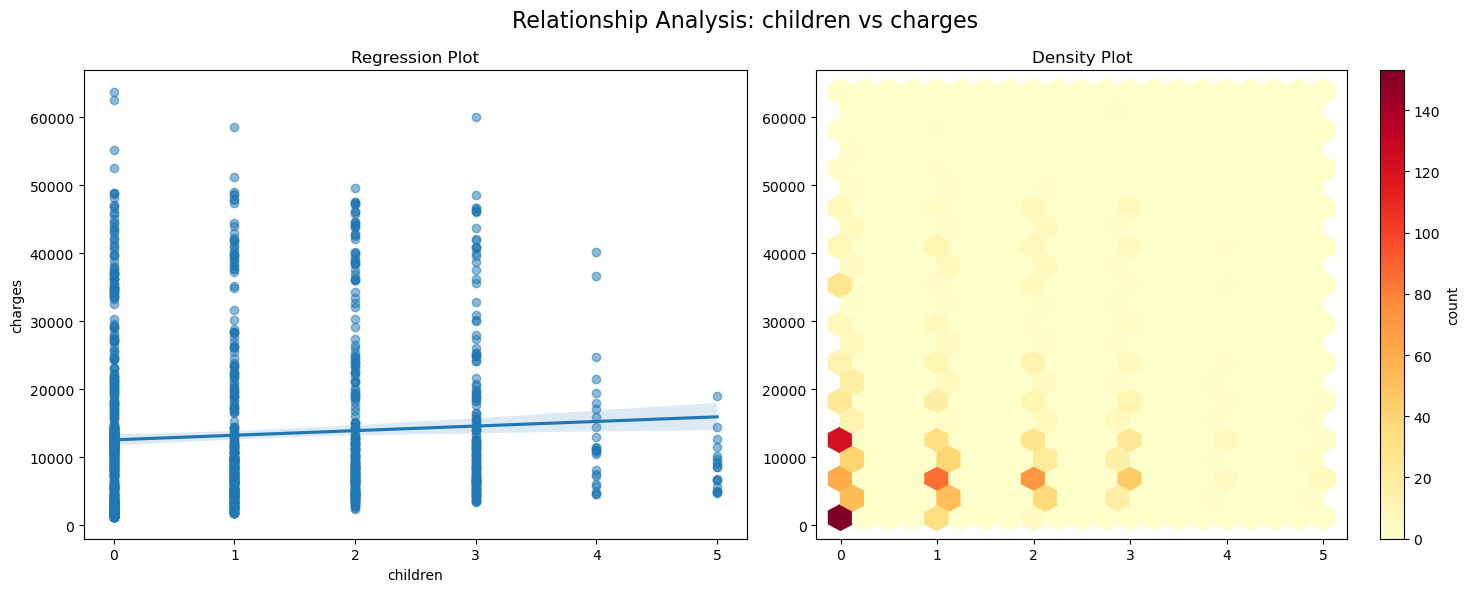

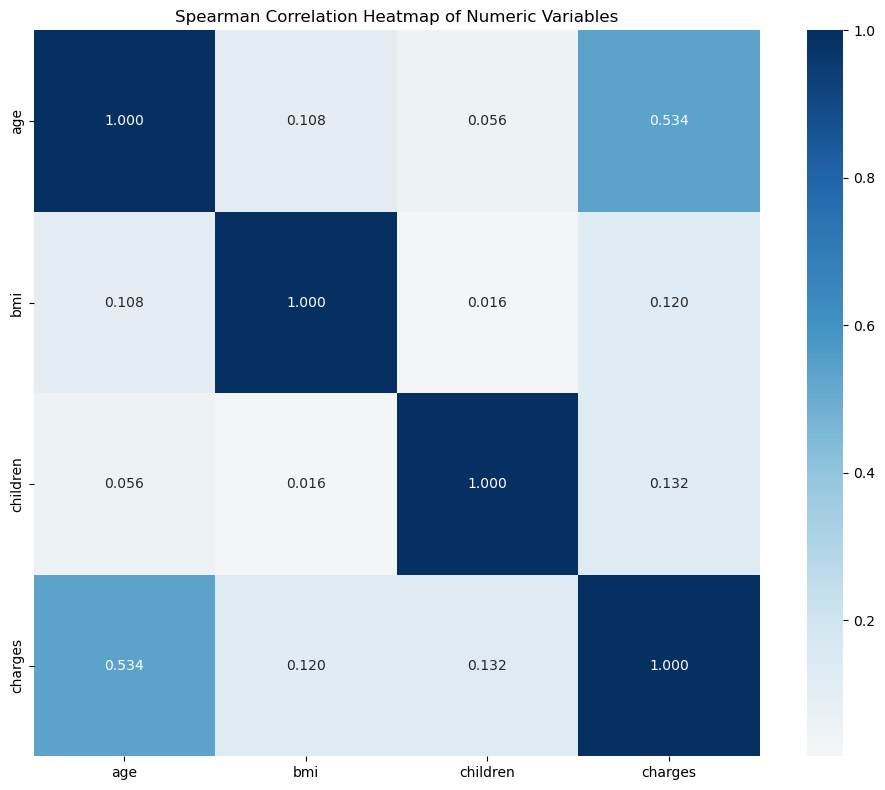

In [30]:
def analyze_numeric_relationships(df, num_cols):
    # Create helper function to interpret the correlation coefficient based on Pearson Correlation values
    def interpret_correlation(value):
        abs_val = abs(value)
        if abs_val < 0.1: return "Negligible"
        elif abs_val < 0.3: return "Small"
        elif abs_val < 0.5: return "Medium"
        else: return "Large"

    # Create helper function to interpret the predictive power based on R-squared values
    def interpret_r_squared(value):
        if value < 0.02: return "Negligible"
        elif value < 0.13: return "Small"
        elif value < 0.26: return "Medium"
        else: return "Large"

    # Create helper function to assess normality using skewness and kurtosis thresholds
    def check_normality(data, variable_name):
        # Return boolean indicating if distribution can be considered approximately normal
        skewness = abs(stats.skew(data)) # Gets magnitude of distribution skewness
        kurtosis = abs(stats.kurtosis(data)) # Gets magnitude of distribution tailedness
        return (skewness < 0.5) and (abs(kurtosis) < 1) # Returns True if both measures are within normal ranges

    # Create helper function to assess relationship linearity using Pearson correlation p-value
    def check_linearity(x, y):
        _, p_value = stats.pearsonr(x, y)
        return p_value < 0.05

    # Initialize containers for analysis result
    results = []  # List to store the statistics results for later analysis
    pairs_to_plot = []  # List to store variable pairs for visualization

    # Iterate through all pairs of numeric variables
    for i in range(len(num_cols)):
        for j in range(i+1, len(num_cols)):
            var1, var2 = num_cols[i], num_cols[j] # Gets current pair of variables
            data1, data2 = df[var1], df[var2]  # Gets their corresponding data series

            # Check normality and linearity for the variables
            is_normal1 = check_normality(data1, var1) # Tests if first variable is normally distributed
            is_normal2 = check_normality(data2, var2) # Tests if second variable is normally distributed
            is_linear = check_linearity(data1, data2) # Tests if relationship between variables is linear

             # Create dictionary to store the results for current variable pair
            result_dict = {
                'Var1': var1,
                'Var2': var2,
                f'Dist. of Var1': 'Normal' if is_normal1 else 'Non-normal',
                f'Dist. of Var2': 'Normal' if is_normal2 else 'Non-normal',
                'Rel. Type': 'Linear' if is_linear else 'Non-linear'
            }

            # Calculate correlations based on data properties
            if is_normal1 and is_normal2 and is_linear:  # Pearson correlation
                pearson_corr, p_value = stats.pearsonr(data1, data2)  # Calculates correlation coefficient and significance
                slope, intercept, r_value, _, std_err = stats.linregress(data1, data2) # Performs linear regression
                r_squared = r_value ** 2 # Calculates coefficient of determination

                # Update results with Pearson correlation metrics
                result_dict.update({
                    'Corr. Method': 'Pearson',
                    'Corr. Coefficient': f"{pearson_corr:.4f}",
                    'P-value': f"{p_value:.4f}",
                    'R-squared': f"{r_squared:.4f}",
                    'Rel. Strength': interpret_correlation(pearson_corr)
                })

            else:  # Spearman correlation for non-normal distributions or non-linear relationships
                spearman_corr, p_value = stats.spearmanr(data1, data2) # Calculates rank correlation

                # Update results with Spearman correlation metrics
                result_dict.update({
                    'Corr. Method': 'Spearman',
                    'Corr. Coefficient': f"{spearman_corr:.4f}",
                    'P-value': f"{p_value:.4f}",
                    'Rel. Strength': interpret_correlation(spearman_corr)
                })

            # Append results and variable pairs for visualization
            results.append(result_dict)
            pairs_to_plot.append((var1, var2, is_linear))

    # Create and display results table
    results_df = pd.DataFrame(results)
    print("=== Numerical Variable Relationship Analysis ===:\n")
    print(results_df.to_string(index=False))

    # Create visualizations for each pair
    for var1, var2, is_linear in pairs_to_plot:
        data1, data2 = df[var1], df[var2]

        # Create figure and axes for charts
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Relationship Analysis: {var1} vs {var2}', fontsize=16)

        # Create appropriate scatter plot based on relationship type
        if is_linear:
            # Create regression line for linear relationships
            sns.regplot(data=df, x=var1, y=var2, ax=axes[0], scatter_kws={'alpha':0.5})
            axes[0].set_title('Regression Plot')
        else:
            # Create simple scatter plot for non-linear relationships
            sns.scatterplot(data=df, x=var1, y=var2, ax=axes[0], alpha=0.5)
            axes[0].set_title('Scatter Plot')

        # Create density plot to show concentration of points
        plt.sca(axes[1]) # Sets current axes for density plot
        plt.hexbin(data1, data2, gridsize=20, cmap='YlOrRd') # Creates hexagonal binning plot
        plt.colorbar(label='count') # Adds color scale showing point density
        axes[1].set_title('Density Plot')

        plt.tight_layout()
        plt.show()

    # Create a correlation heatmap for all numeric variables
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[num_cols].corr(method='spearman')  # Calculates correlation matrix using Spearman method
    sns.heatmap(correlation_matrix, 
                annot=True, # Shows correlation values in cells
                cmap='RdBu',  # Uses red-blue color scheme
                center=0, # Centers color scale at 0
                fmt='.3f',  # Formats numbers to 3 decimal places
                square=True) # Makes cells square shaped
    plt.title('Spearman Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()

    return results_df

# Call the function
results_table = analyze_numeric_relationships(df, num_cols)

Take-aways:

1- Age is the strongest predictor of insurance charges. (ρ = 0.53)

2- BMI and Children variables have statistically significant but weak effects on charges. (ρ = 0.12 and 0.13 respectively)

3- Age and BMI have also significant but weak effects on each other. (ρ = 0.11)


Normality Analysis for Age:

1. Descriptive Statistics:
Skewness: 0.055 (±0.5 for approximately normal)
Kurtosis: -1.244 (±1 for approximately normal)

2. Statistical Tests:
Shapiro-Wilk test: p=0.0000 (>0.05 for normal)
Kolmogorov-Smirnov test: p=0.0000 (>0.05 for normal)


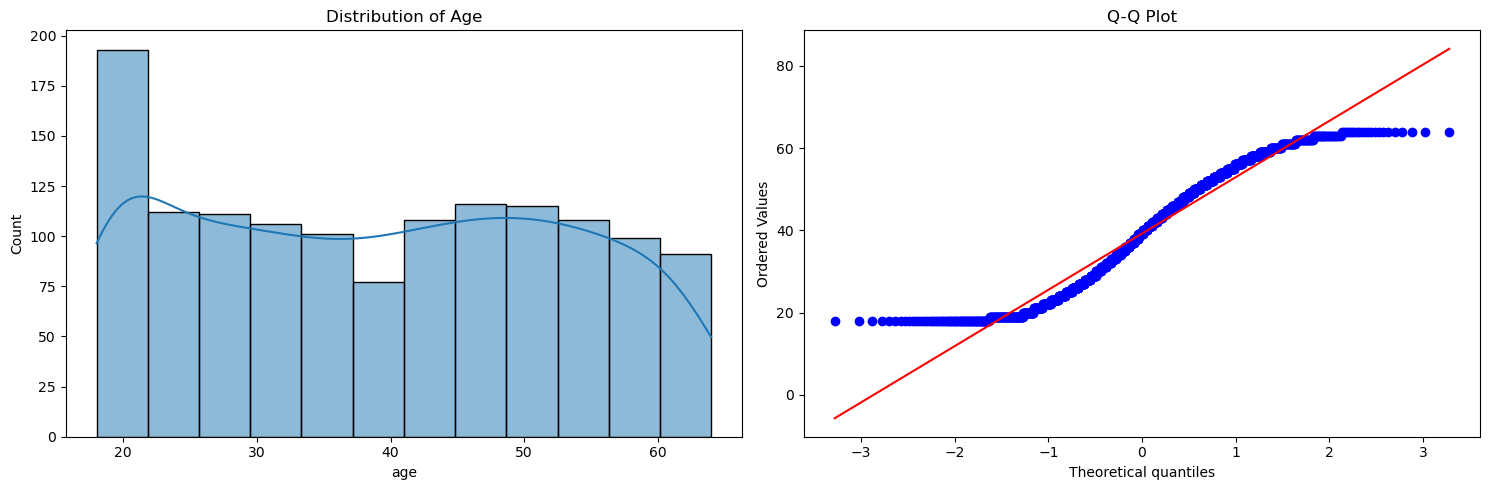


3. Summary:
Skewness Test: Passed
Kurtosis Test: Failed
Shapiro-Wilk Test: Failed
Kolmogorov-Smirnov Test: Failed


In [19]:
def check_normality_comprehensive(data, variable_name):
    # 1. Descriptive Statistics
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # 2. Statistical Tests
    shapiro_stat, shapiro_p = stats.shapiro(data)
    ks_stat, ks_p = stats.kstest(data, 'norm')
    
    # Print results
    print(f"\nNormality Analysis for {variable_name}:")
    print("\n1. Descriptive Statistics:")
    print(f"Skewness: {skewness:.3f} (±0.5 for approximately normal)")
    print(f"Kurtosis: {kurtosis:.3f} (±1 for approximately normal)")
    
    print("\n2. Statistical Tests:")
    print(f"Shapiro-Wilk test: p={shapiro_p:.4f} (>0.05 for normal)")
    print(f"Kolmogorov-Smirnov test: p={ks_p:.4f} (>0.05 for normal)")
    
    # 3. Visual Checks
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram with normal curve
    sns.histplot(data=data, ax=ax1, kde=True)
    ax1.set_title(f'Distribution of {variable_name}')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Decision based on multiple criteria
    is_normal_skew = abs(skewness) < 0.5
    is_normal_kurt = abs(kurtosis) < 1
    is_normal_shapiro = shapiro_p > 0.05
    is_normal_ks = ks_p > 0.05
    
    print("\n3. Summary:")
    print(f"Skewness Test: {'Passed' if is_normal_skew else 'Failed'}")
    print(f"Kurtosis Test: {'Passed' if is_normal_kurt else 'Failed'}")
    print(f"Shapiro-Wilk Test: {'Passed' if is_normal_shapiro else 'Failed'}")
    print(f"Kolmogorov-Smirnov Test: {'Passed' if is_normal_ks else 'Failed'}")
    
    return {
        'skewness': skewness,
        'kurtosis': kurtosis,
        'shapiro_p': shapiro_p,
        'ks_p': ks_p,
        'is_normal_descriptive': is_normal_skew and is_normal_kurt,
        'is_normal_statistical': is_normal_shapiro or is_normal_ks
    }

# Test for age
age_normality = check_normality_comprehensive(df['age'], 'Age')

### 2.3. Categorical vs Numerical Summary


Detailed Group Statistics:
Cat_Var  Num_Var  Category      Mean    Median       Std
    sex      age    female    39.500    40.000    14.050
    sex      age      male    38.950    39.000    14.040
    sex      bmi    female    30.380    30.110     6.050
    sex      bmi      male    30.940    30.690     6.140
    sex children    female     1.070     1.000     1.190
    sex children      male     1.120     1.000     1.220
    sex  charges    female 12569.580  9412.960 11128.700
    sex  charges      male 13975.000  9377.900 12971.960
 smoker      age        no    39.400    40.000    14.080
 smoker      age       yes    38.510    38.000    13.920
 smoker      bmi        no    30.650    30.300     6.050
 smoker      bmi       yes    30.710    30.450     6.320
 smoker children        no     1.090     1.000     1.220
 smoker children       yes     1.110     1.000     1.160
 smoker  charges        no  8440.660  7345.730  5992.970
 smoker  charges       yes 32050.230 34456.350 11541.550
 re

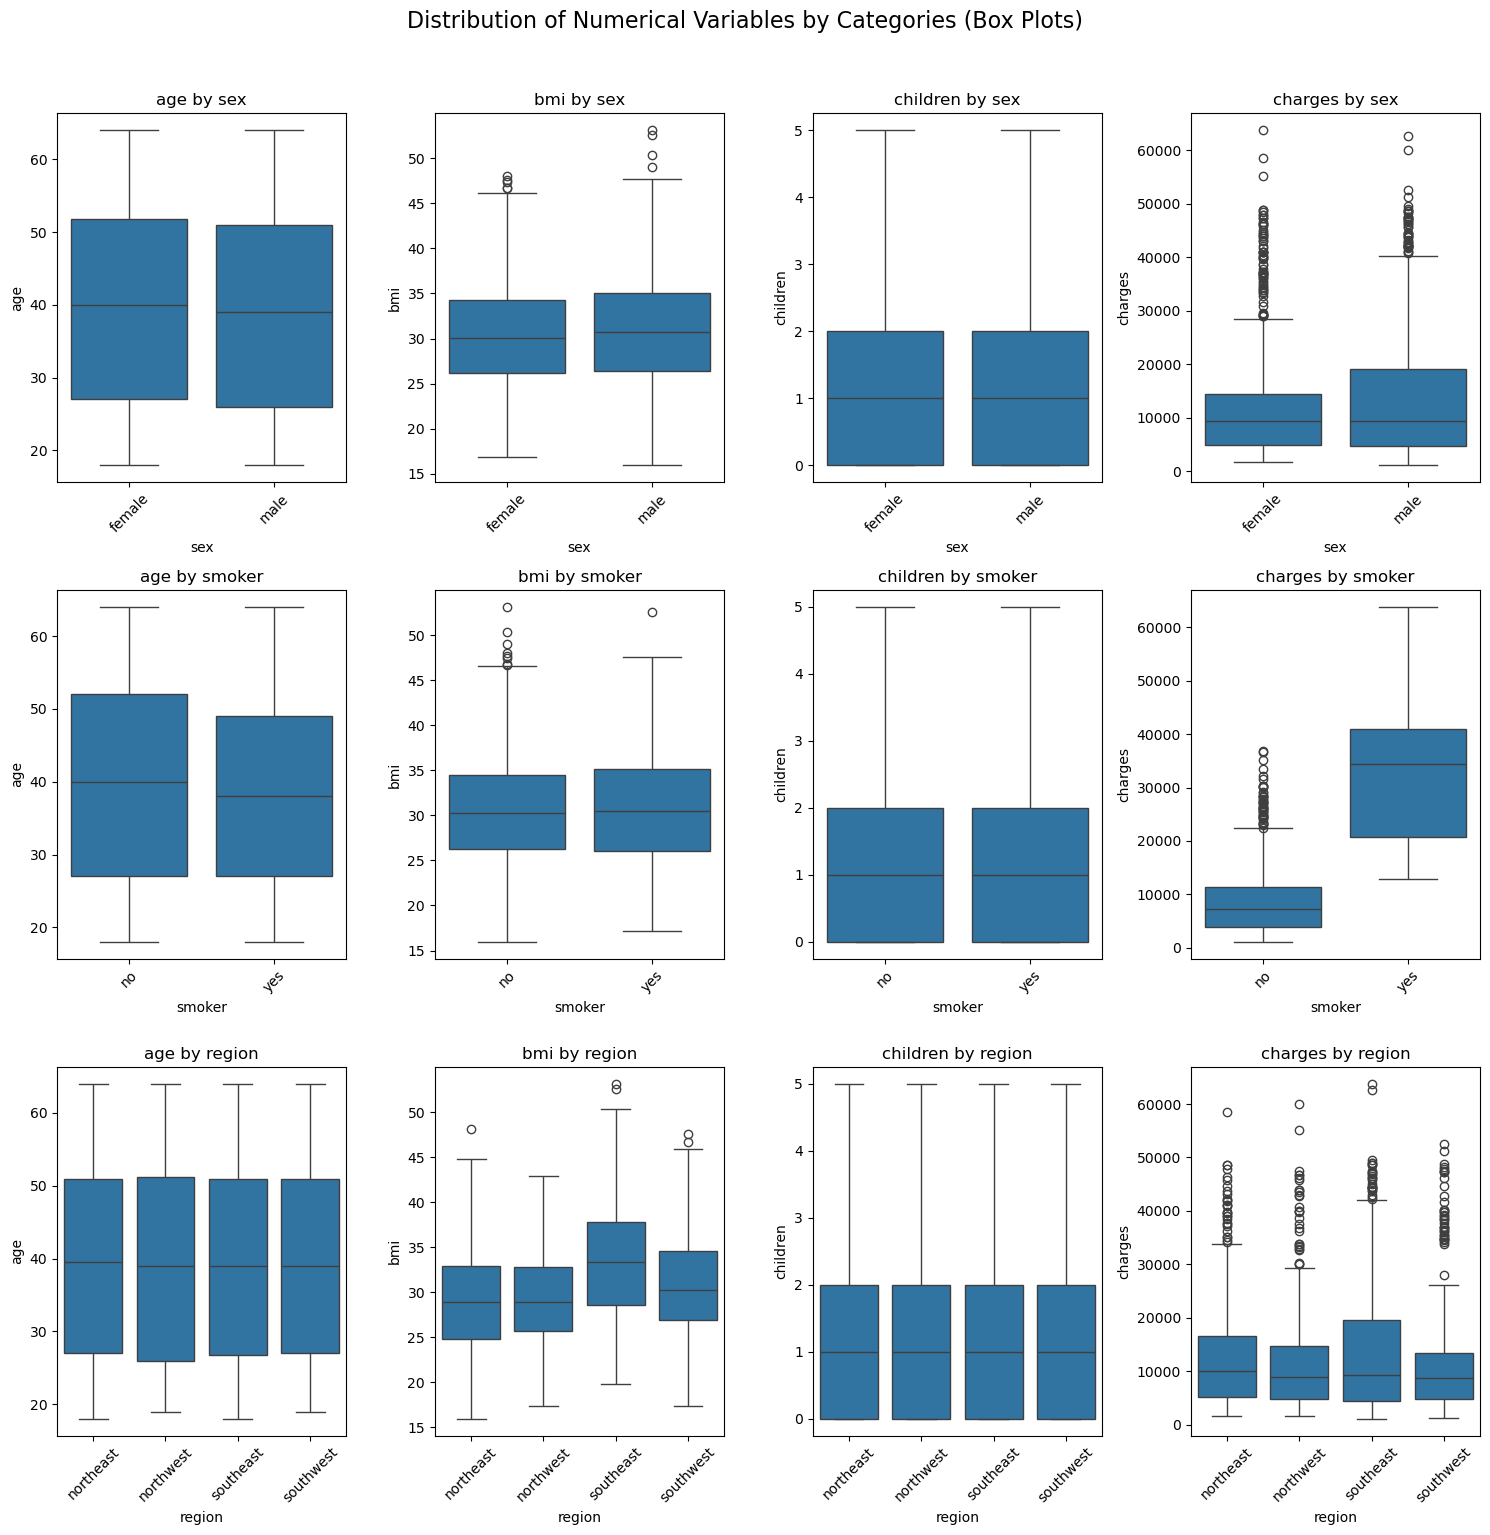

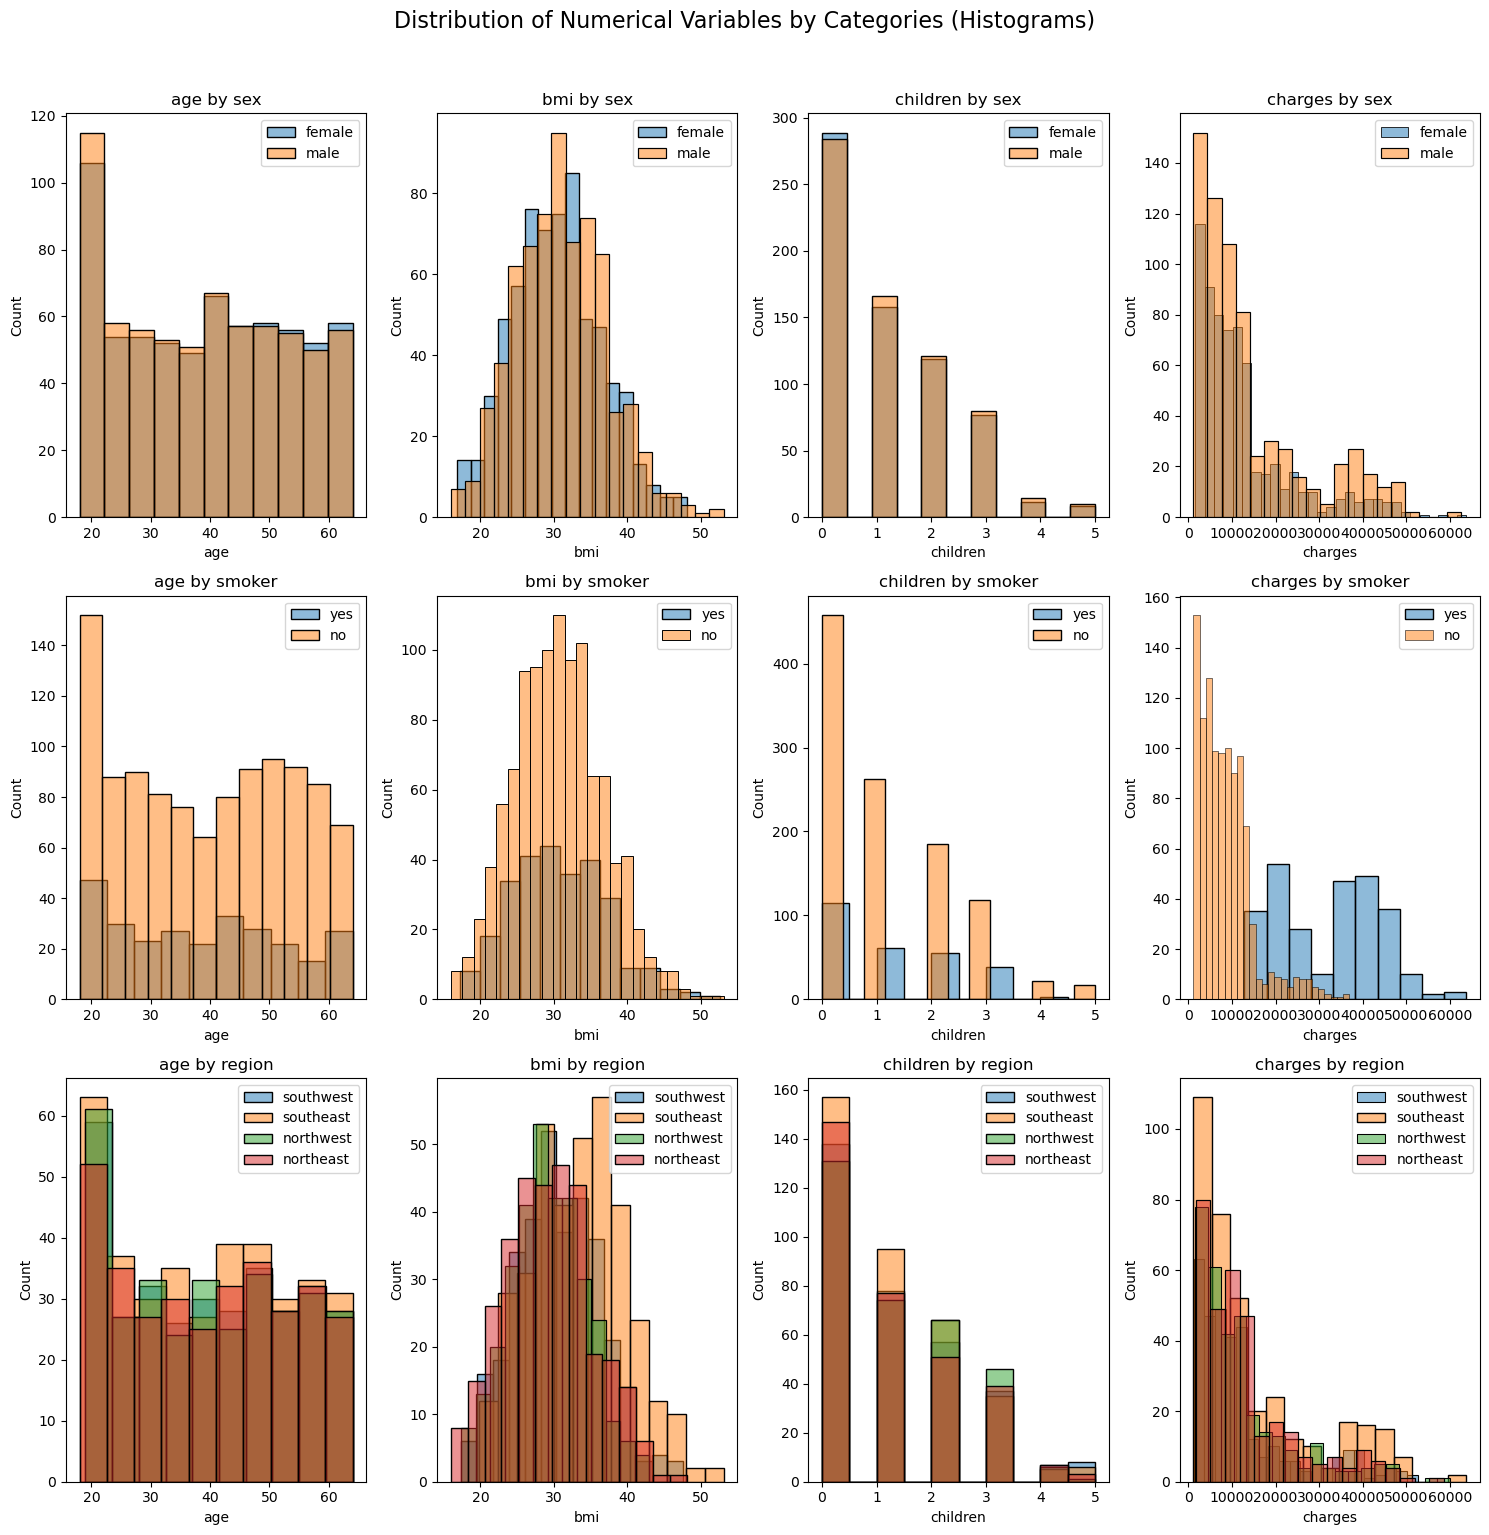

In [37]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_categorical_numerical_relationships(df):
    # Remove 'bmi_cat' from the categorical columns
    cat_cols_trimmed = [col for col in cat_cols if col != 'bmi_cat']
    
    # Initialize an empty list to store the results
    results = []
    
    # Loop through each categorical column
    for cat_col in cat_cols_trimmed:
        # Count the number of unique categories in the categorical column
        n_categories = len(df[cat_col].unique())
        
        # Loop through each numerical column
        for num_col in num_cols:
            # Prepare a dictionary to store analysis results for the pair of variables
            result_dict = {
                'Categorical Variable': cat_col,
                'Numerical Variable': num_col,
                'Number of Categories': n_categories
            }
            
            # Perform group-wise aggregates (mean, median, and std) for each category
            agg_stats = df.groupby(cat_col, observed=True)[num_col].agg(['mean', 'median', 'std']).round(2)
            result_dict.update({
                'Group Stats': agg_stats.to_dict('index')
            })
            
            # Statistical testing: if the categorical variable has only two categories, use a t-test
            if n_categories == 2:
                group1, group2 = df[cat_col].unique()
                t_stat, p_val = stats.ttest_ind(
                    df[df[cat_col] == group1][num_col],
                    df[df[cat_col] == group2][num_col]
                )
                result_dict['Test Type'] = 't-test'
                result_dict['P-value'] = f"{p_val:.4f}"
                
                # If the t-test is significant, calculate the point-biserial correlation and effect size
                if p_val < 0.05:
                    r_pb, p_val_pb = stats.pointbiserialr(
                        df[cat_col].cat.codes, 
                        df[num_col]
                    )
                    result_dict['Correlation'] = f"{r_pb:.4f}"
                    result_dict['Correlation P-value'] = f"{p_val_pb:.4f}"
                    
                    # Interpret the effect size
                    if abs(r_pb) < 0.1:
                        strength = "Negligible"
                    elif abs(r_pb) < 0.24:
                        strength = "Small"
                    elif abs(r_pb) < 0.37:
                        strength = "Medium"
                    else:
                        strength = "Large"
                    result_dict['Effect Size'] = strength
            
            # If the categorical variable has more than two categories, perform normality and variance tests
            else:
                # Check normality for each group using the Shapiro-Wilk test
                normal = True
                for group in df[cat_col].unique():
                    _, p = stats.shapiro(df[df[cat_col] == group][num_col])
                    if p < 0.05:
                        normal = False
                        break
                
                # If normal, perform an ANOVA test
                if normal:
                    groups = [group[num_col].values for name, group in df.groupby(cat_col, observed=True)]
                    f_stat, p_val = stats.f_oneway(*groups)
                    result_dict['Test Type'] = 'ANOVA'
                    result_dict['P-value'] = f"{p_val:.4f}"
                    
                    # If the ANOVA test is significant, calculate the effect size (eta squared)
                    if p_val < 0.05:
                        eta_sq = pg.compute_effsize(
                            data=df,
                            dv=num_col,
                            between=cat_col,
                            eftype='eta2'
                        )
                        result_dict['Effect Size Measure'] = 'Eta squared'
                        result_dict['Effect Size Value'] = f"{eta_sq:.4f}"
                        
                        # Interpret the effect size strength
                        if eta_sq < 0.01:
                            strength = "Negligible"
                        elif eta_sq < 0.06:
                            strength = "Small"
                        elif eta_sq < 0.14:
                            strength = "Medium"
                        else:
                            strength = "Large"
                        result_dict['Effect Size'] = strength
                        
                # If not normal, perform the Kruskal-Wallis test
                else:
                    groups = [group[num_col].values for name, group in df.groupby(cat_col, observed=True)]
                    h_stat, p_val = stats.kruskal(*groups)
                    result_dict['Test Type'] = 'Kruskal-Wallis'
                    result_dict['P-value'] = f"{p_val:.4f}"
            
            # Append the result dictionary for this pair of variables
            results.append(result_dict)
    
    # Convert the results list to a DataFrame for easy display
    results_df = pd.DataFrame(results)
    
        # Create a comprehensive group statistics table
    print("\nDetailed Group Statistics:")
    all_stats = pd.DataFrame()
    
    for idx, row in results_df.iterrows():
        cat_var = row['Categorical Variable']
        num_var = row['Numerical Variable']
        stats_df = pd.DataFrame(row['Group Stats']).T
        
        # Reset index and add variable names as columns
        stats_df = stats_df.reset_index()
        stats_df.columns = ['Category', 'Mean', 'Median', 'Std']
        stats_df['Cat_Var'] = cat_var  # Shortened from 'Categorical Variable'
        stats_df['Num_Var'] = num_var  # Shortened from 'Numerical Variable'
        
        # Reorder columns to put variable names first
        stats_df = stats_df[['Cat_Var', 'Num_Var', 'Category', 'Mean', 'Median', 'Std']]
        
        # Append to main statistics DataFrame
        all_stats = pd.concat([all_stats, stats_df], ignore_index=True)
    
    # Display the comprehensive statistics table
    print(all_stats.to_string(index=False))
    
    # Print summary of statistical tests and effect sizes
    print("\nCategorical-Numerical Relationship Analysis:")
    print("\nStatistical Tests and Effect Sizes:")
    display_cols = ['Categorical Variable', 'Numerical Variable', 'Test Type', 
                   'P-value', 'Effect Size', 'Number of Categories']
    print(results_df[display_cols].to_string(index=False))
    
    # Calculate number of unique categorical variables for subplot layout
    n_cat_vars = len(cat_cols_trimmed)
    
    # Create figure for box plots
    fig_box, axes_box = plt.subplots(n_cat_vars, len(num_cols), 
                                    figsize=(15, 5*n_cat_vars))
    fig_box.suptitle('Distribution of Numerical Variables by Categories (Box Plots)', 
                     fontsize=16, y=1.02)
    
    # Create figure for histograms
    fig_hist, axes_hist = plt.subplots(n_cat_vars, len(num_cols), 
                                      figsize=(15, 5*n_cat_vars))
    fig_hist.suptitle('Distribution of Numerical Variables by Categories (Histograms)', 
                      fontsize=16, y=1.02)
    
    # Create visualizations
    for i, cat_var in enumerate(cat_cols_trimmed):
        for j, num_var in enumerate(num_cols):
            # Create box plot
            sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes_box[i,j])
            axes_box[i,j].set_title(f'{num_var} by {cat_var}')
            axes_box[i,j].tick_params(axis='x', rotation=45)
            
            # Create histogram
            for category in df[cat_var].unique():
                sns.histplot(data=df[df[cat_var] == category], 
                           x=num_var, 
                           ax=axes_hist[i,j], 
                           alpha=0.5,
                           label=category)
            axes_hist[i,j].set_title(f'{num_var} by {cat_var}')
            axes_hist[i,j].legend()
    
    # Adjust layout
    fig_box.tight_layout()
    fig_hist.tight_layout()
    
    # Display plots
    plt.show()
    
    return results_df

# Run the analysis
results = analyze_categorical_numerical_relationships(df)

Take-aways:

1- Slightly higher charges for males (p=0.034), but relationship is negligible (r=0.058)

2- Very strong relationship with charges (p<0.001). Largest effect among all categorical variables.

3- Only significant relationship is with BMI (p<0.001):(Southeast region with mean=33.36)